# <center> <font style="color:rgb(100,109,254)">  Image Pyramids  </font> </center>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> What are Image Pyramids </font>

Normally, we used to work with an image of constant size. But on some occasions, we need to work with (the same) images in different resolution. For example, (in obeject detection) while searching for something in an image, like face, we are not sure at what size the object will be present in said image. In that case, we will need to create a set of the same image with different resolutions and search for object in all of them. These set of images with different resolutions are called Image Pyramids (because when they are kept in a stack with the highest resolution image at the bottom and the lowest resolution image at top, it looks like a pyramid).


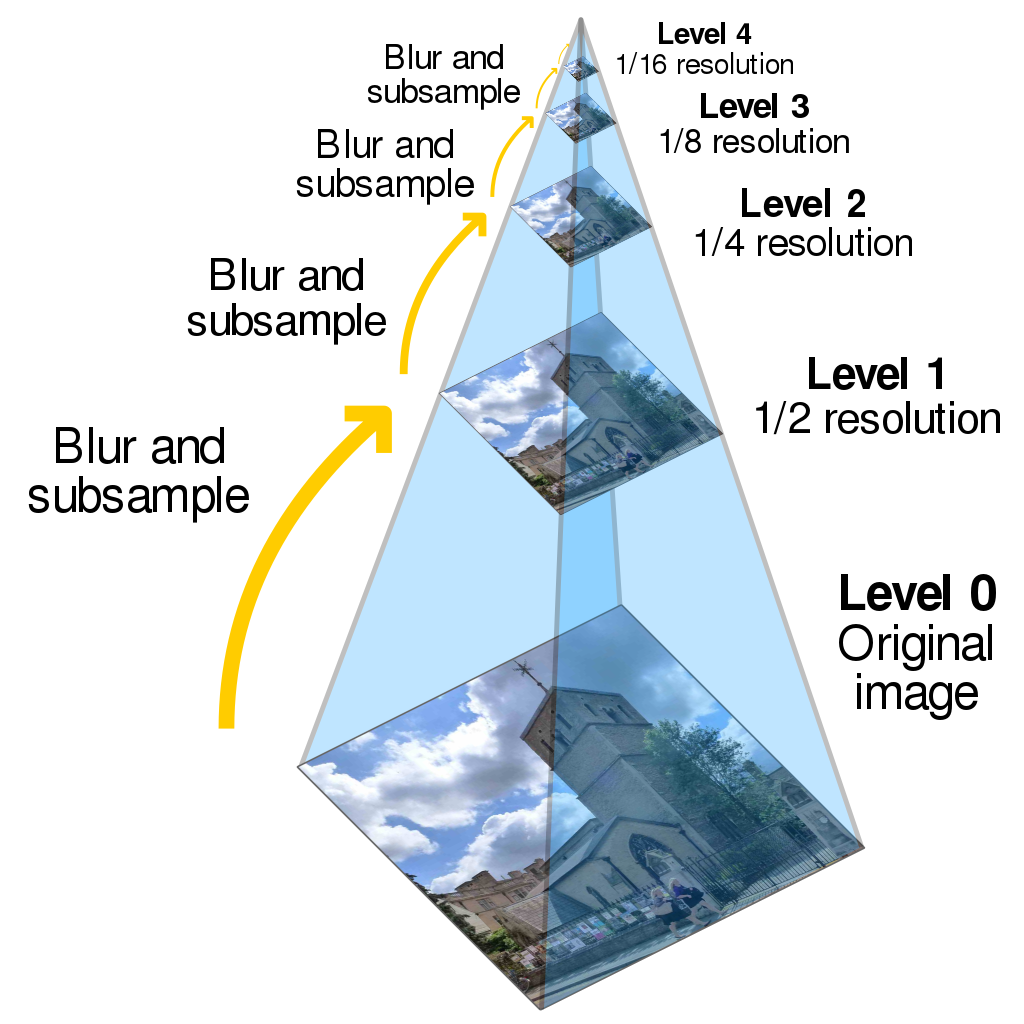
<center>cmglee</center>

[Image CC By-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)


There are two kinds of Image Pyramids.
1. Gaussian Pyramid 
2. Laplacian Pyramids

#  <font style="color:rgb(134,19,348)"> Gaussian Pyramids </font>


Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a M×N image becomes M/2×N/2 image. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level. 

We can find Gaussian pyramids using `cv2.pyrDown()` and `cv2.pyrUp()` functions.

##  <font style="color:rgb(134,19,348)"> pyrDown </font>

> **dst	=	cv.pyrDown(	src[, dst[, dstsize[, borderType]]]	)**

- `src`	input image.
- `dst`	output image; it has the specified size and the same type as src.
- `dstsize`	size of the output image.
- `borderType`	Pixel extrapolation method.

This function Blurs an image and downsamples it

The function performs the downsampling step of the Gaussian pyramid construction. First, it convolves the source image with a gaussian kernel. Then, it downsamples the image by rejecting even rows and columns.


## <font style="color:rgb(134,19,348)">  Down Sampling in Opencv</font>

Text(0.5, 1.0, '3 levels Down')

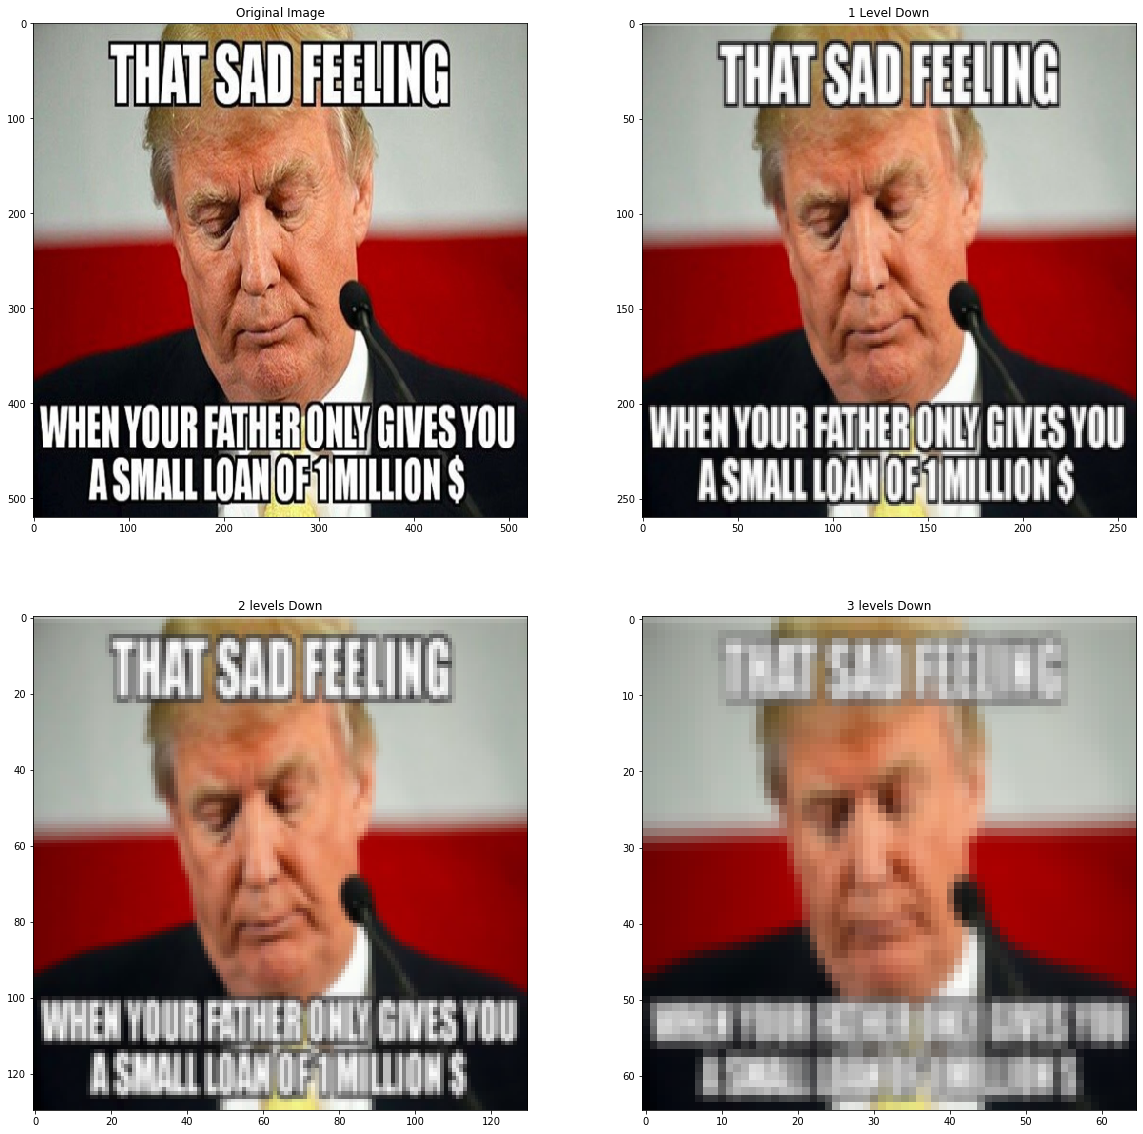

In [2]:
img = cv2.imread('media/M4/Trump1.jpg')

# just resizing to have shape 520,520 so we can easily go 3 levels down without running into an odd number.
img = cv2.resize(img, (520, 520))

# this is how you go one level down, this image is 260,260
lower_reso = cv2.pyrDown(img)

# this is how you go two levels down, this image is 130,130
lower_reso2 = cv2.pyrDown(lower_reso)


# this is how you go two levels down, this image is 75,75
lower_reso3 = cv2.pyrDown(lower_reso2)

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image")
plt.subplot(222);plt.imshow(lower_reso[:,:,::-1]);plt.title("1 Level Down")
plt.subplot(223);plt.imshow(lower_reso2[:,:,::-1]);plt.title("2 levels Down")
plt.subplot(224);plt.imshow(lower_reso3[:,:,::-1]);plt.title("3 levels Down")

## <font style="color:rgb(134,19,348)">  pyrUp </font>

[```dst = cv.pyrUp(	src[, dst[, dstsize[, borderType]]]	)```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gada75b59bdaaca411ed6fee10085eb784)

- `src`	input image.
- `dst`	output image; it has the specified size and the same type as src.
- `dstsize`	size of the output image.
- `borderType`	Pixel extrapolation method.

This function Upsamples an image and then blurs it.

The function performs the upsampling step of the Gaussian pyramid construction, though it can actually be used to construct the Laplacian pyramid, it upsamples the source image by injecting even zero rows and columns and then convolves the result with the same kernel as in pyrDown multiplied by 4.

## <font style="color:rgb(134,19,348)">  Upsampling in Opencv </font>
Upsampling is mostly used for contructing laplacian pyramids, which we will see later.

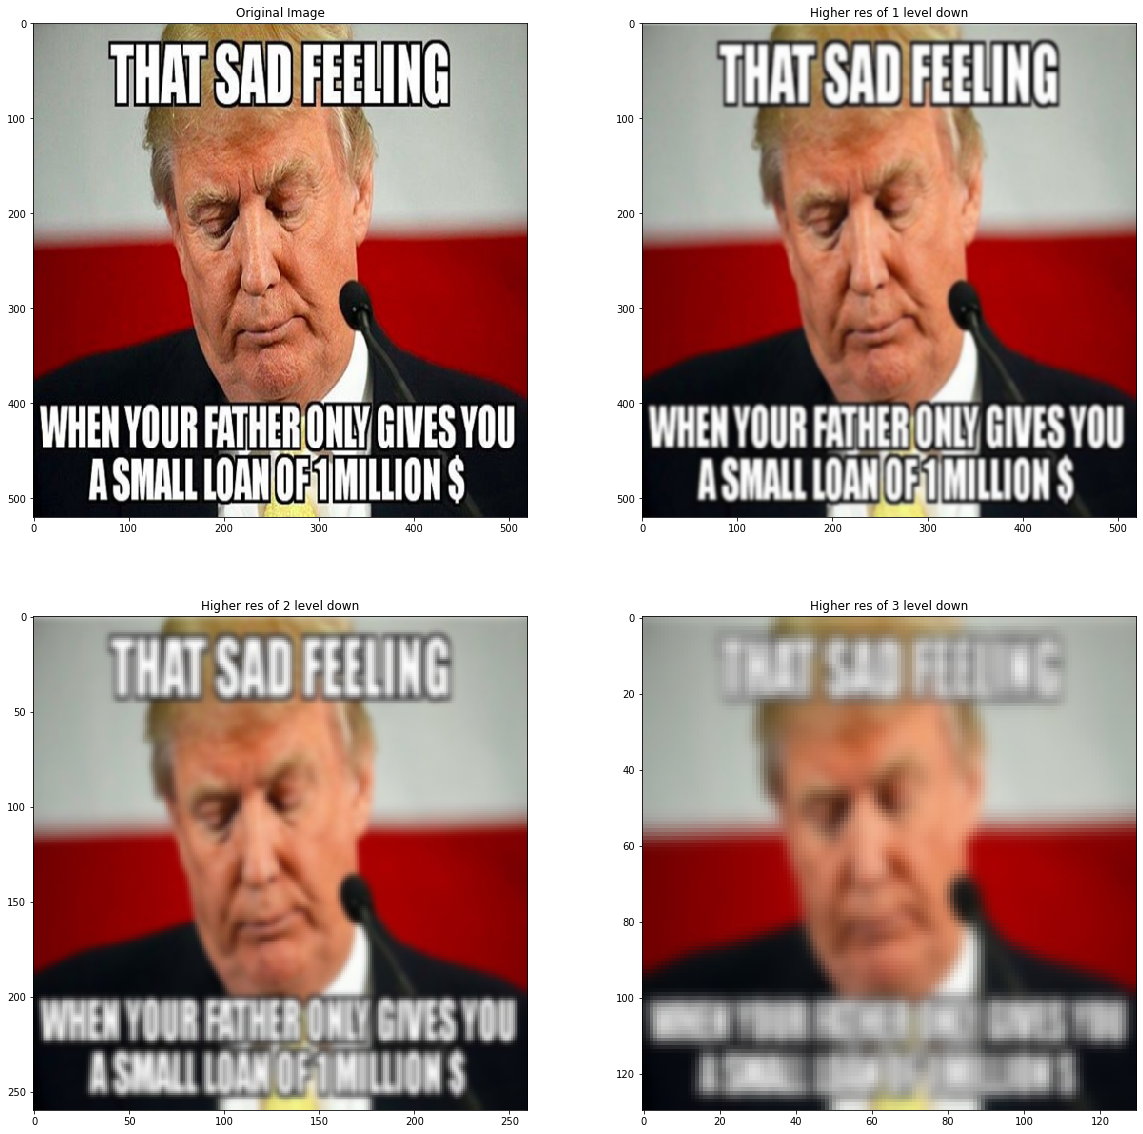

In [3]:
# higher resolution of one level down image
higher_reso = cv2.pyrUp(lower_reso)

# higher resolution of two levels down image
higher_reso2 = cv2.pyrUp(lower_reso2)

# higher resolution of three levels down image
higher_reso3 = cv2.pyrUp(lower_reso3)

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image")
plt.subplot(222);plt.imshow(higher_reso[:,:,::-1]);plt.title("Higher res of 1 level down")
plt.subplot(223);plt.imshow(higher_reso2[:,:,::-1]);plt.title("Higher res of 2 level down")
plt.subplot(224);plt.imshow(higher_reso3[:,:,::-1]);plt.title("Higher res of 3 level down");

## <font style="color:rgb(134,19,348)"> What are Laplacian Pyramids </font>

Laplacian Pyramids are formed from the Gaussian Pyramids. There is no exclusive function for that. Laplacian pyramid images are like edge images only. Most of its elements are zeros. They are used in image compression. A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid. 

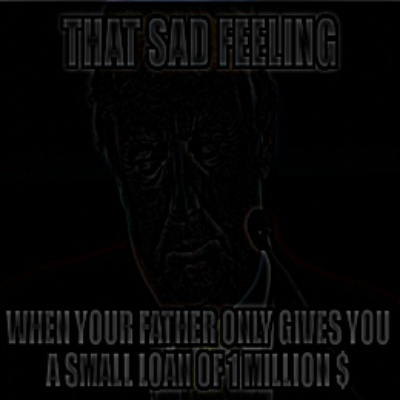

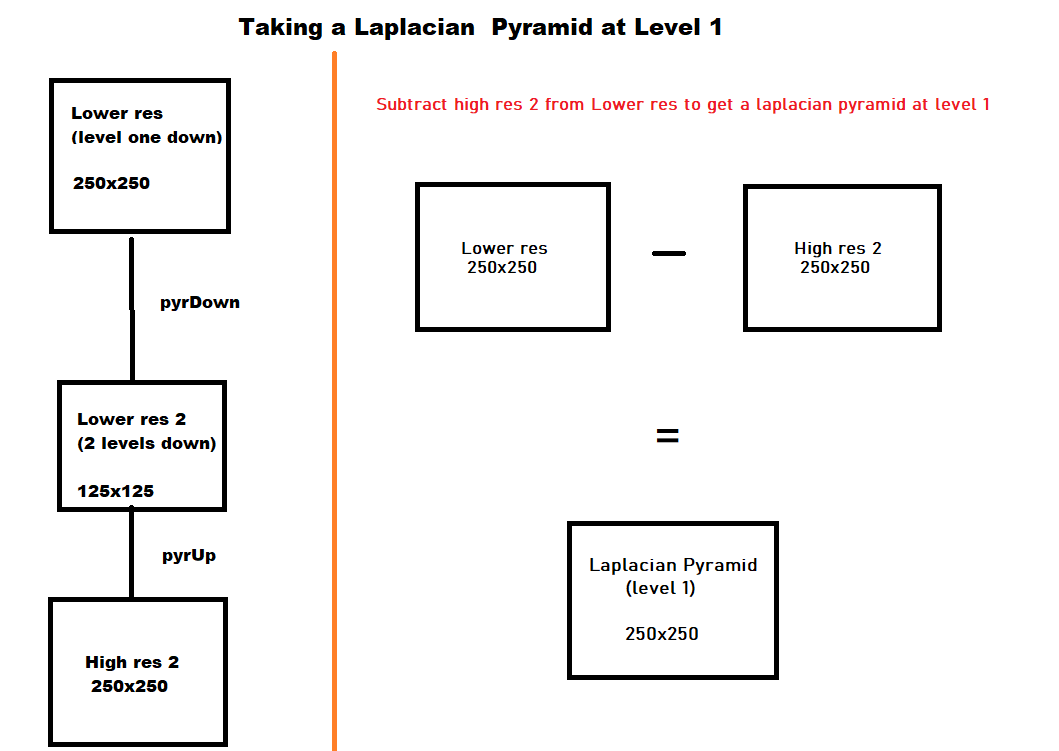

##  <font style="color:rgb(134,19,348)"> Laplacian pyramids in Opencv  </font>
This is how you can take laplacians at different levels, for greater visualization you can increase the contrast.

See that lower reso and higher reso2 shapes are same (260, 260, 3) (260, 260, 3)
See that lower reso2 and higher reso3 shapes are same (130, 130, 3) (130, 130, 3)


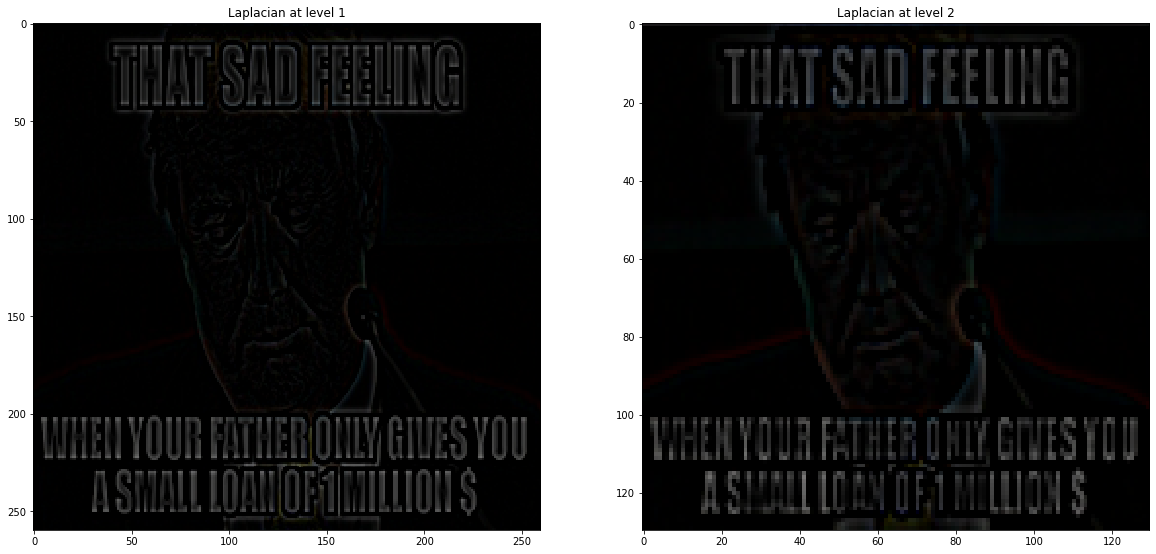

In [4]:
print('See that lower reso and higher reso2 shapes are same',lower_reso.shape,higher_reso2.shape)
# this is a laplacian pyramid at level 1
Laplacian_at_level1 = cv2.subtract(lower_reso,higher_reso2 ) 

print('See that lower reso2 and higher reso3 shapes are same',lower_reso2.shape,higher_reso3.shape)
# this is a laplacian pyramid at level 1
Laplacian_at_level2 = cv2.subtract(lower_reso2,higher_reso3 )

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(Laplacian_at_level1[:,:,::-1]);plt.title("Laplacian at level 1");  
plt.subplot(122);plt.imshow(Laplacian_at_level2[:,:,::-1]);plt.title("Laplacian at level 2"); 